Support Vector Machines for Fashion MNIST:
========================
___

![alt text](./images/SVM.png "Logo Title Text 1")

In [1]:
import struct
import numpy as np
import pandas as pd
from sklearn import svm, metrics
import matplotlib.pyplot as plt
%matplotlib inline

### **Importing the Data:**

In [2]:
PATH="./input/fashionmnist/"
train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Checking Class distribution**

In [4]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)

    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        print("{:<20s}:   {}".format(label, count))

get_classes_distribution(train_data)

Ankle Boot          :   6000
Bag                 :   6000
Sneaker             :   6000
Shirt               :   6000
Sandal              :   6000
Coat                :   6000
Dress               :   6000
Pullover            :   6000
Trouser             :   6000
T-shirt/top         :   6000


In [5]:
get_classes_distribution(test_data)

Sneaker             :   1000
Shirt               :   1000
Sandal              :   1000
Coat                :   1000
Dress               :   1000
Pullover            :   1000
Ankle Boot          :   1000
Trouser             :   1000
Bag                 :   1000
T-shirt/top         :   1000


In [6]:
# prepare the data
X = train_data.loc[:, train_data.columns != 'label']/255.0
y = train_data.loc[:,train_data.columns == 'label']

X_test = test_data.loc[:, train_data.columns != 'label']/255.0
y_test = test_data.loc[:,train_data.columns == 'label']

From https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [7]:
import timeit
start_time = timeit.default_timer()
svc = svm.SVC(C=5, gamma=0.05).fit(X,y)
elapsed = timeit.default_timer() - start_time

/Users/sigmarabi1/opt/anaconda3/envs/TFlow_Py36Env/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
print('Time to train the SVM model in minutes: {}'.format(round(elapsed/60,2)))

Time to train the SVM model in minutes: 24.49


In [9]:
start_time = timeit.default_timer()
y_pred = svc.predict(X_test)
elapsed2 = timeit.default_timer() - start_time

print('Time to predict using SVM model in minutes: {}'.format(round(elapsed2/60,2)))

Time to predict using SVM model in minutes: 3.39


In [10]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# 
def plot_confusion_matrix(y_true, 
                          y_pred, 
                          classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [11]:
np.set_printoptions(precision=2)
labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
class_names = np.array(labels)
class_names

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'], dtype='<U11')

Confusion matrix, without normalization
[[875   0  12  16   0   3  85   0   9   0]
 [  3 982   3   8   0   1   3   0   0   0]
 [ 13   0 841  12  64   0  58   0  12   0]
 [ 21   7   7 923  24   0  16   0   2   0]
 [  2   0  51  28 870   0  43   0   6   0]
 [  0   0   0   0   0 967   0  20   4   9]
 [112   0  60  23  49   0 744   0  12   0]
 [  0   0   0   0   0  10   0 958   0  32]
 [  1   0   3   2   1   2   6   1 984   0]
 [  0   0   0   0   0   5   0  26   1 968]]
Normalized confusion matrix
[[0.88 0.   0.01 0.02 0.   0.   0.09 0.   0.01 0.  ]
 [0.   0.98 0.   0.01 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.84 0.01 0.06 0.   0.06 0.   0.01 0.  ]
 [0.02 0.01 0.01 0.92 0.02 0.   0.02 0.   0.   0.  ]
 [0.   0.   0.05 0.03 0.87 0.   0.04 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.02 0.   0.01]
 [0.11 0.   0.06 0.02 0.05 0.   0.74 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.96 0.   0.03]
 [0.   0.   0.   0.   0.   0.   0.01 0.   0.98 0.  ]
 [0.   0.   0.   0.   0.

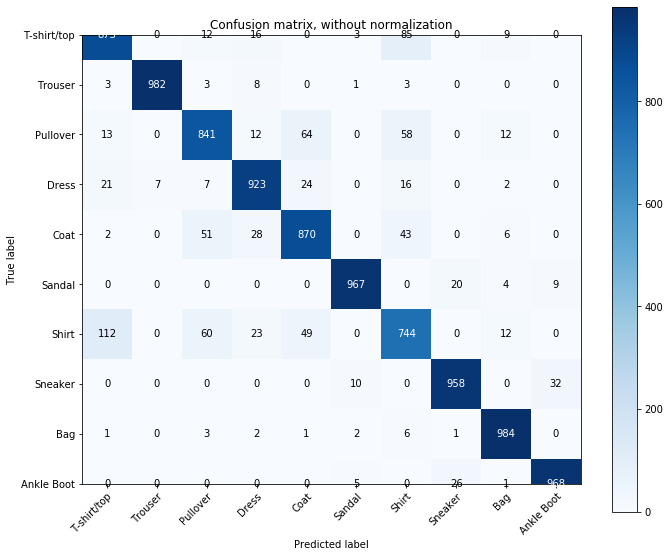

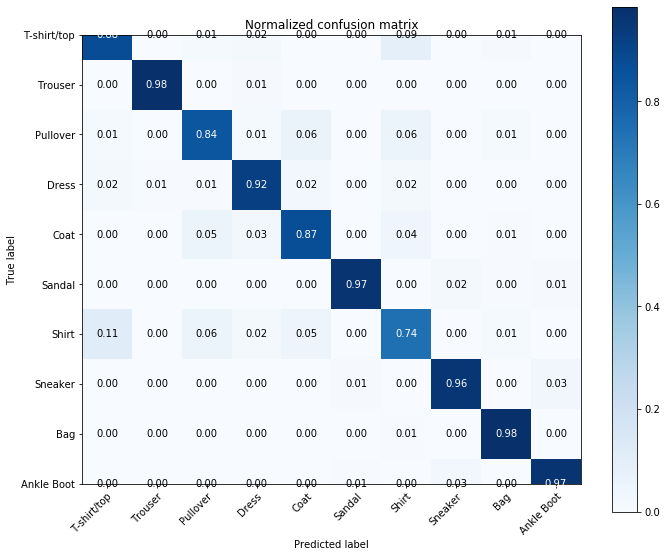

<Figure size 1152x576 with 0 Axes>

In [12]:
# # Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.figure(figsize=(16,8))
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.84      0.85      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.86      0.87      0.87      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.78      0.74      0.76      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.96      0.98      0.97      1000
  Ankle Boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### The End